In [35]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score

In [36]:
df = pd.read_csv("feeds.csv")

In [37]:
df.tail()

,current,voltage,temperature,humidity,vibration
198,5.8,232.0,59.22,68.0,0.0
199,NaN,NaN,NaN,NaN,NaN
200,NaN,NaN,NaN,NaN,NaN
201,NaN,NaN,NaN,NaN,NaN
202,NaN,NaN,NaN,NaN,NaN


In [38]:
#Removing Null values
update_df = df.drop([199, 200, 201,202])

In [39]:
update_df

,current,voltage,temperature,humidity,vibration
0,5.1,229.0,65.23,68.0,0.0
1,5.9,230.0,65.56,70.0,1.0
2,8.2,227.0,65.62,68.0,1.0
3,5.5,235.0,65.29,69.0,0.0
4,5.3,235.0,60.42,70.0,0.0
...,...,...,...,...,...
194,5.7,235.0,59.57,68.0,0.0
195,5.7,225.0,59.78,68.0,0.0
196,5.9,231.0,63.28,69.0,1.0
197,5.1,226.0,66.32,70.0,0.0


In [40]:
update_df.describe()

,current,voltage,temperature,humidity,vibration
count,199.000000,199.000000,199.000000,199.000000,199.000000
mean,5.683417,231.311558,61.063869,69.085427,0.070352
std,0.596434,3.411717,3.616215,0.851463,0.256384
min,5.000000,225.000000,55.200000,68.000000,0.000000
25%,5.300000,229.000000,58.780000,68.000000,0.000000
50%,5.700000,232.000000,59.880000,69.000000,0.000000
75%,5.900000,234.000000,63.340000,70.000000,0.000000
max,8.200000,235.000000,67.910000,70.000000,1.000000


In [41]:
update_df.shape

(199, 5)

In [42]:
update_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   current      199 non-null    float64
 1   voltage      199 non-null    float64
 2   temperature  199 non-null    float64
 3   humidity     199 non-null    float64
 4   vibration    199 non-null    float64
dtypes: float64(5)
memory usage: 7.9 KB


In [43]:
update_df.isnull().sum()

current        0
voltage        0
temperature    0
humidity       0
vibration      0
dtype: int64

In [44]:
x = update_df.iloc[:,[0,1,2,3,4]].values

In [45]:
print(x)

[[  5.1  229.    65.23  68.     0.  ]
 [  5.9  230.    65.56  70.     1.  ]
 [  8.2  227.    65.62  68.     1.  ]
 [  5.5  235.    65.29  69.     0.  ]
 [  5.3  235.    60.42  70.     0.  ]
 [  5.3  230.    59.22  69.     0.  ]
 [  5.2  226.    63.34  69.     0.  ]
 [  5.7  234.    66.4   70.     0.  ]
 [  5.3  234.    59.57  68.     0.  ]
 [  5.8  231.    59.78  69.     0.  ]
 [  5.7  230.    56.16  68.     0.  ]
 [  6.   233.    56.06  70.     0.  ]
 [  5.4  233.    63.6   68.     0.  ]
 [  5.7  230.    61.48  70.     0.  ]
 [  5.5  225.    67.91  70.     0.  ]
 [  5.4  232.    63.58  70.     0.  ]
 [  5.5  225.    64.31  68.     0.  ]
 [  5.2  233.    59.73  70.     0.  ]
 [  5.5  233.    67.89  70.     0.  ]
 [  5.6  226.    61.82  68.     0.  ]
 [  5.3  234.    67.17  69.     0.  ]
 [  5.6  235.    58.89  68.     0.  ]
 [  5.4  234.    56.25  69.     0.  ]
 [  5.   231.    55.2   68.     0.  ]
 [  5.9  235.    58.78  68.     0.  ]
 [  5.1  226.    62.41  70.     0.  ]
 [  5.8  232

In [46]:
#using wcss

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++', random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\princ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


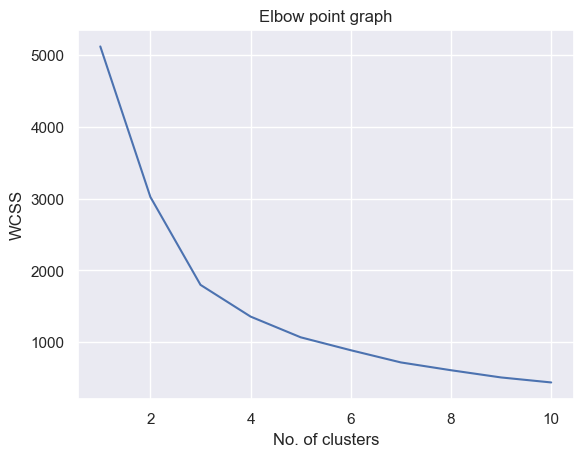

In [60]:
#plot elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('Elbow point graph')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

In [61]:
#Optimum no. of cluster is 2

kmeans = KMeans(n_clusters = 2,init = 'k-means++', random_state = 0)

y = kmeans.fit_predict(x)

In [62]:
print(y)

[1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1
 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0
 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1
 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0
 1 1 0 0 0 1 0 1 1 0 1 1 1 0]


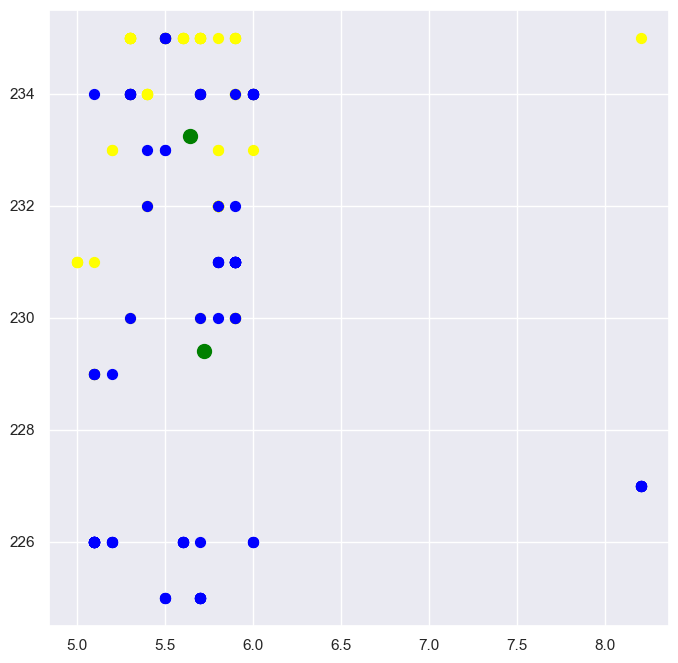

In [63]:
#scater plot
#visualiszing ploting
plt.figure(figsize = (8,8))
plt.scatter(x[y == 0,0], x[y == 0,1], s = 50, c= 'yellow', label ='C1')
plt.scatter(x[y == 1,0], x[y == 1,1], s = 50, c= 'blue', label ='C2')


plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 100, c='green', label ='Centroid')
plt.show()

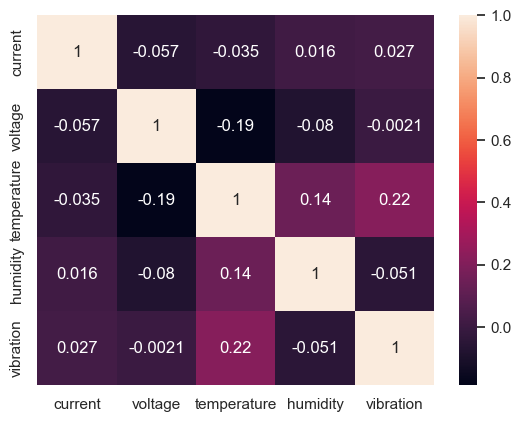

In [64]:
sns.heatmap(update_df.corr(),annot=True)
plt.show()

In [65]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")

In [66]:
classifier.fit(x,y)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [67]:
ypred= classifier.predict(x)
ypred

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0])

In [68]:
accuracy_score(y, ypred)

1.0

In [69]:
# input
#0 5.8	232	59.22	68	0
#1 5.1	229	65.23	68	0

current = 5.8
voltage = 232
temperature = 59.22
humidity = 68
vibration = 0

#current = 5.1
#voltage = 229
#temperature = 65.23
#humidity = 68
#vibration = 0


In [70]:
test = [[current, voltage, temperature, humidity, vibration]]


In [110]:
def give_pred(test):
    prediction=classifier.predict(test)
    
    if prediction == 0:
       return('System Failed')
    else:
       return('System Work')
   

In [111]:
print(give_pred(test))

System Failed
